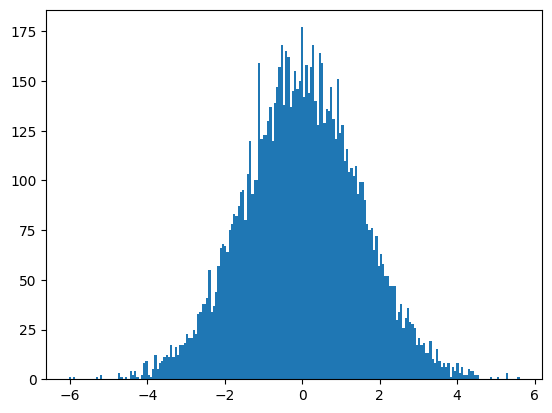

0.9551


In [11]:
import random  
import matplotlib.pyplot as plt  
    
# store the random numbers in a list  
nums = []  
mu = 0
sigma = 1.5
threes = 0
    
for i in range(10000):  
    temp = random.gauss(mu, sigma)
    if temp > -3 and temp < 3: threes += 1   
    nums.append(temp)  
        
# plotting a graph  
plt.hist(nums, bins = 200)  
plt.show()
print(threes/10000) 

     deg     theta      magdB
179    0  0.000000  25.759111
180    1  0.017453  25.513777
181    2  0.034907  24.767265
182    3  0.052360  23.497477
183    4  0.069813  21.664482
..   ...       ...        ...
174  355  6.195919  15.978206
175  356  6.213372  19.176024
176  357  6.230825  21.645241
177  358  6.248279  23.484986
178  359  6.265732  24.759739

[360 rows x 3 columns]


C:\Users\euan\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


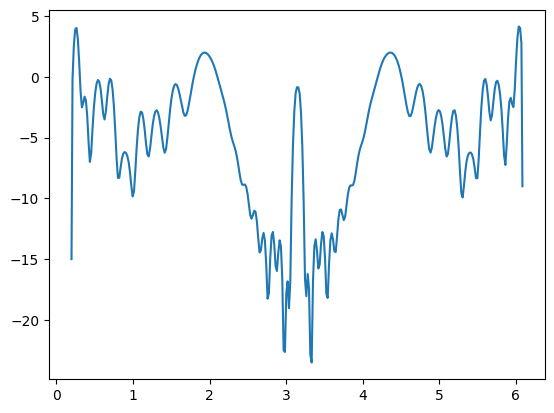

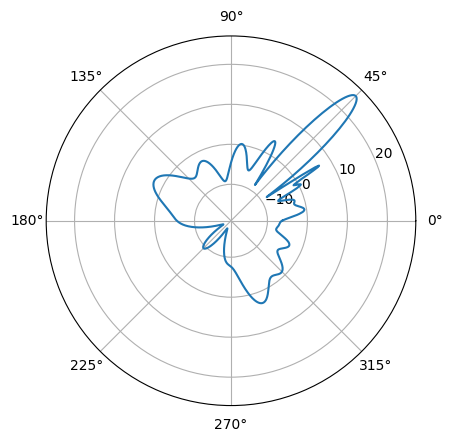

In [25]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def main_lobe_gain(theta):
    g = 50 * np.power(np.cos(theta),57)
    return g-25

wanted_keys = ('theta', 'magdB')
mat = scipy.io.loadmat('ExampleDishFarfieldAz.mat')
pqr = pd.Series(mat)
mat_dict = {key : pqr.to_dict()[key] for key in wanted_keys}
theta = []
deg = []
magdB = []
zeroVal = 0

for i in range(0, len(mat_dict['theta'][0])):
    if mat_dict['theta'][0][i] == 0: zeroVal = mat_dict['magdB'][i][0]
    if mat_dict['theta'][0][i] < 0: 
        theta.append(np.deg2rad(mat_dict['theta'][0][i] + 360))
        deg.append(mat_dict['theta'][0][i]+360)
    else:
        theta.append(np.deg2rad(mat_dict['theta'][0][i]))
        deg.append(mat_dict['theta'][0][i])
    magdB.append(mat_dict['magdB'][i][0])

df = pd.DataFrame()

df["deg"] = deg
df["theta"] = theta
df["magdB"] = magdB

df = df.sort_values("deg")
print(df)

left_lobe_thetas = np.array(df['theta']) > np.pi/16 # and np.array(df['theta']) < (np.pi*2)-np.pi/16
right_lobe_thetas = np.array(df['theta']) < (np.pi*2)-np.pi/16
side_lobe_thetas = np.logical_and(left_lobe_thetas,right_lobe_thetas)

side_lobes = df['theta'][side_lobe_thetas]
lobes_dB = df['magdB'][side_lobe_thetas]

side_lobes = np.append(side_lobes,((np.pi*2)-np.pi/16))
side_lobes = np.insert(side_lobes,0,np.pi/16)

lobes_dB = np.append(lobes_dB,-9)
lobes_dB = np.insert(lobes_dB,0,-15)

figa = plt.figure()
bx = figa.add_subplot()
bx.plot(side_lobes,lobes_dB)

fig = plt.figure()
ax = fig.add_subplot(projection='polar')

coeffs = np.polyfit(side_lobes,lobes_dB,100,rcond=0)
p = np.poly1d(coeffs)

def gain(side_lobe_func, theta):
    theta = np.mod(theta, np.pi*2)
    theta_sides = np.logical_and(theta > np.pi/16, theta < 31*np.pi/16)
    main = np.logical_not(theta_sides)
    gain = np.zeros(thetas.shape)
    
    gain[theta_sides] = side_lobe_func(theta[theta_sides])
    gain[main] = main_lobe_gain(theta[main])
    
    return gain

thetas = np.linspace(0,(np.pi*2),1000)

rotation = np.pi/4

main_lobe_theta = np.linspace(0,np.pi*2,500)
main_lobe_theta = np.mod((main_lobe_theta), 2*np.pi)
theta = main_lobe_gain(main_lobe_theta)

r = np.mod(thetas + 1, 2*np.pi)
#ax.plot(df['theta'], df['magdB'])
#ax.plot(thetas,p(thetas))
#ax.plot(main_lobe_theta, mainlobe)

ax.plot(thetas,gain(p,thetas-(np.pi/4)))

c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:15: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:15: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()
c:\Users\euan\OneDrive\Desktop\Dissertation Project\Angle Probability\Antenna.py:15: RankWarning: Polyfit may be poorly conditioned
  self.side_lobe_function = self.side_lobe_function_init()


[0.  0.2]
[0 0]
[ 0.  -0.2]


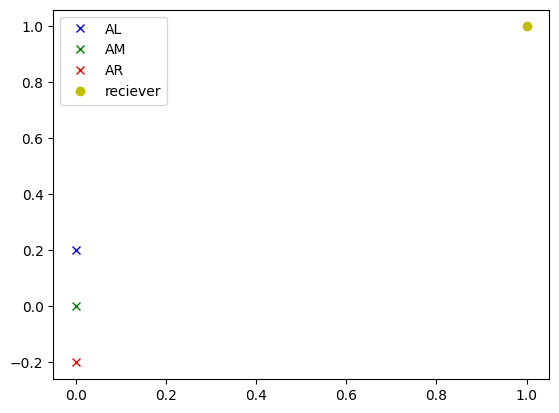

In [1]:
from Antenna import Antenna
from Array import Array
from Model import Model

import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


model = Model()
model.spatial_plot()